In [201]:
import pandas as pd
from os.path import join
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import scipy

# utils

In [202]:
data_dir = 'data'

def read_data(path: str) -> pd.DataFrame:
    df = pd.read_table(path, sep='\t')

    return df

def read_1d() -> pd.DataFrame:
    path = join(data_dir, 'Data1D.txt')

    return read_data(path)

def read_2d() -> pd.DataFrame:
    path = join(data_dir, 'Data2D.txt')

    return read_data(path)

def read_3d() -> pd.DataFrame:
    path = join(data_dir, 'Data3D.txt')

    return read_data(path)

def plot_data(df: pd.DataFrame, name: str=""):
    df.plot(subplots=True, figsize=(18,8), title=name + " features over time", sharex=True)
    plt.tight_layout()
    plt.show()

    fig, axes = plt.subplots(1, 3, figsize=(18,4))
    for i,col in enumerate(df.columns):
        ax = axes[i]
        sns.histplot(df, x=col, kde=True, stat='density', label=col, bins=100, ax=ax)

    plt.tight_layout()
    plt.show()

    sns.heatmap(df.corr(), annot=True).set_title("features correlation")
    plt.show()

# data exploration

data1d

In [203]:
df1d = read_1d()
df1d.head()

,Velocity_x,Thrust,Torque
0,0.879756,172.872149,9.886818
1,1.166636,355.714131,20.796062
2,1.072081,313.254705,18.495993
3,1.121321,338.039430,19.832787
4,1.103311,324.032530,19.143733


In [204]:
df1d.isna().sum()

Velocity_x    0
Thrust        0
Torque        0
dtype: int64

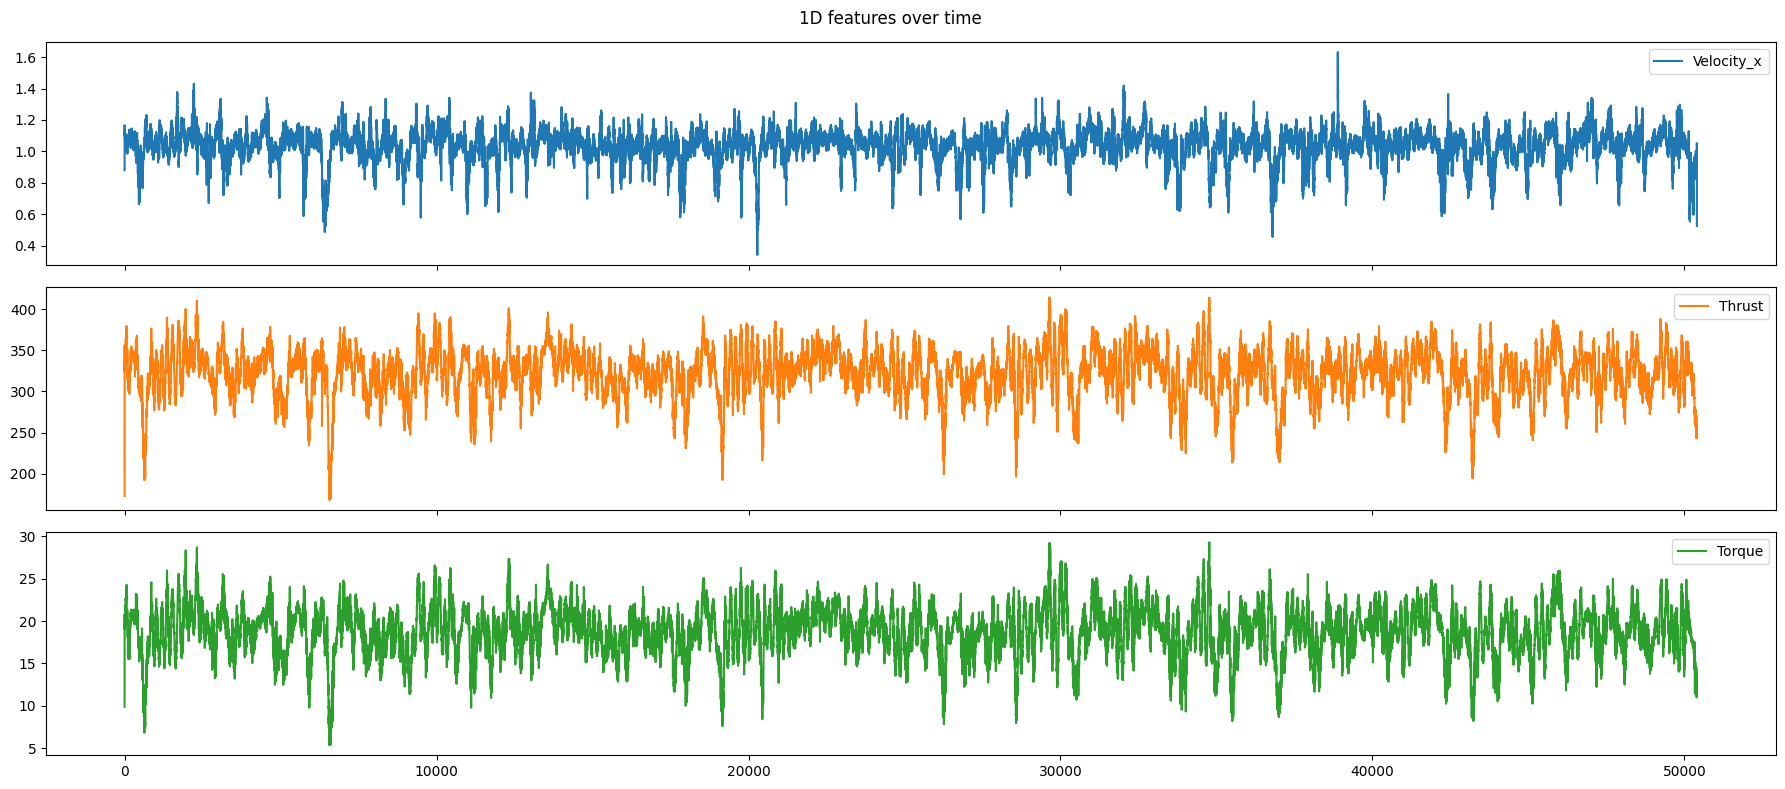

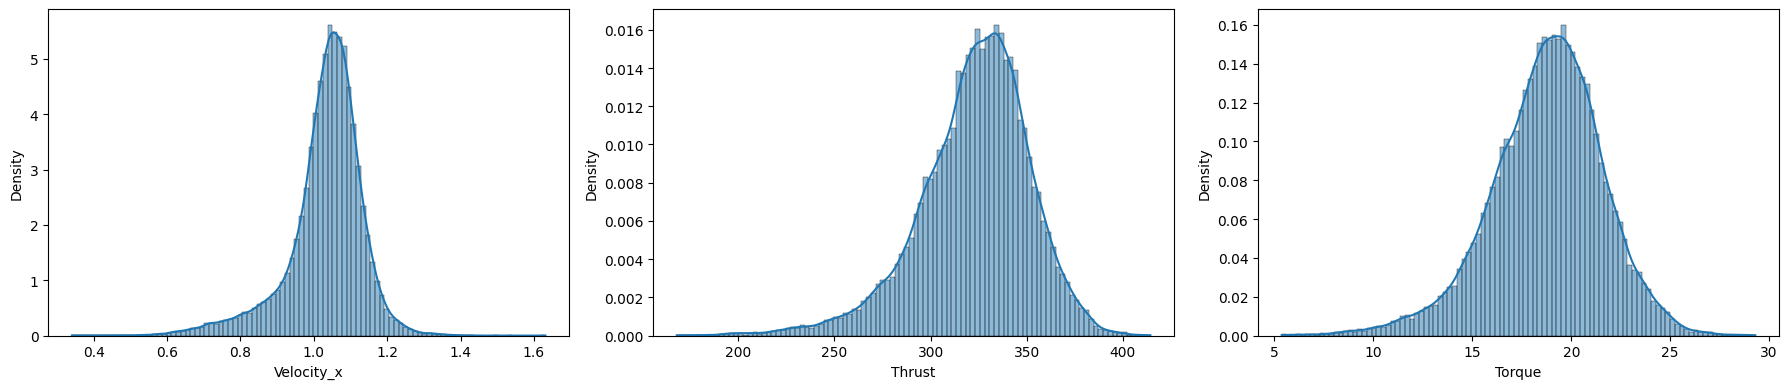

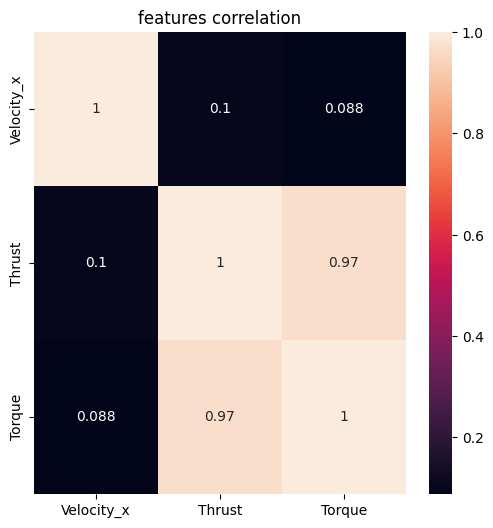

In [205]:
plot_data(df1d, '1D')

data2d

In [206]:
df2d = read_2d()
df2d.head()

,Velocity_x,Thrust,Torque
0,1.150615,328.599067,19.824394
1,1.094055,351.091916,20.921102
2,1.109197,336.498516,19.844573
3,1.054571,346.888847,20.463177
4,1.088980,341.021605,20.083180


In [207]:
df2d.isna().sum()

Velocity_x    0
Thrust        0
Torque        0
dtype: int64

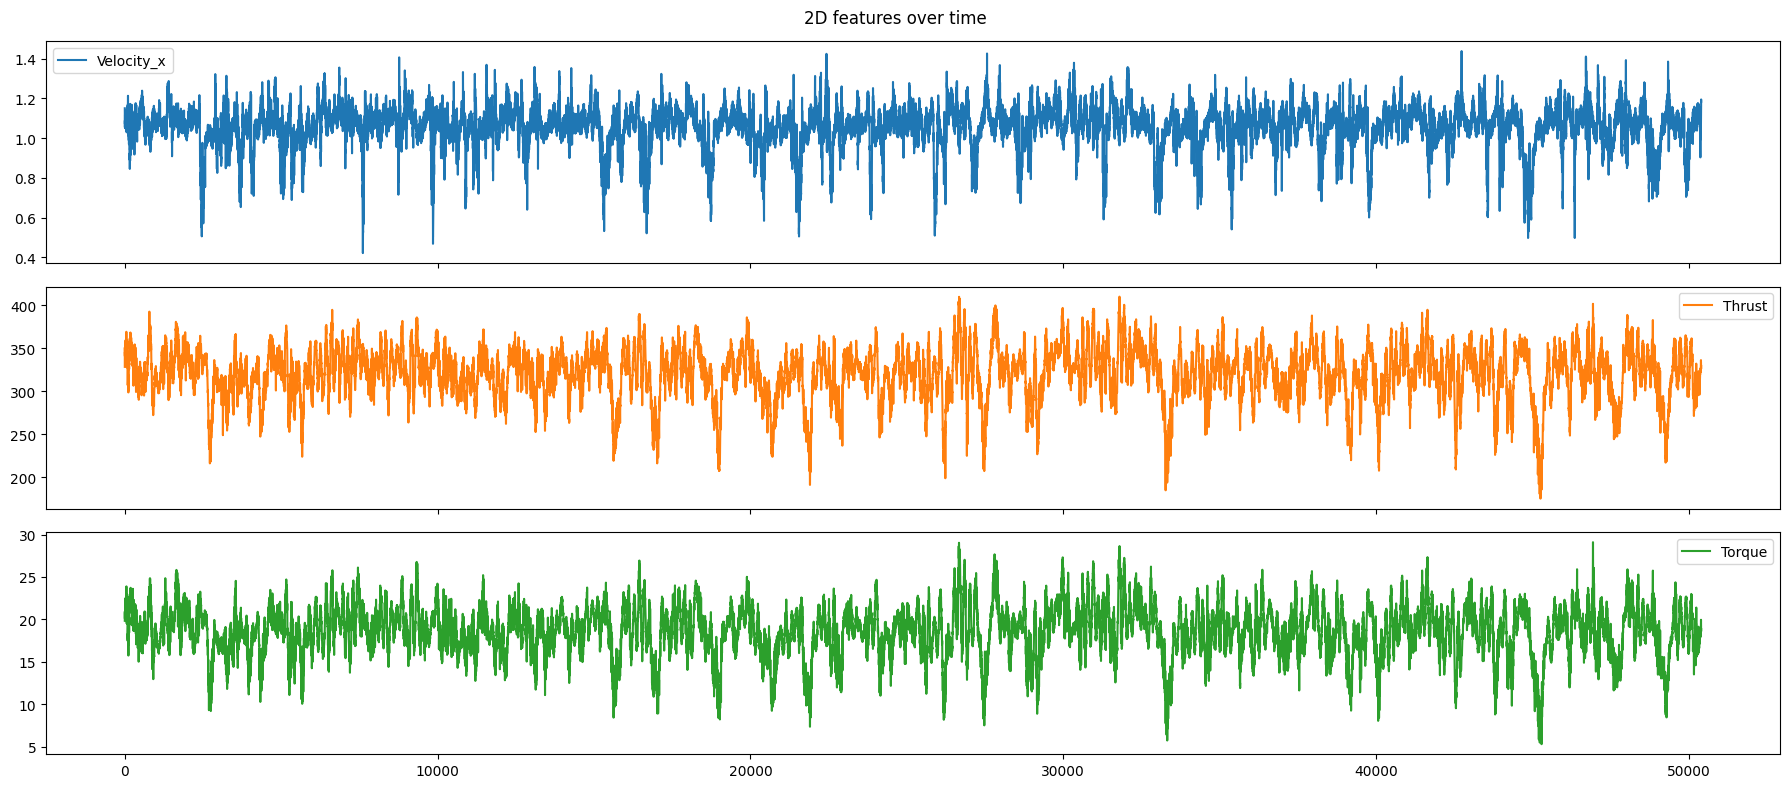

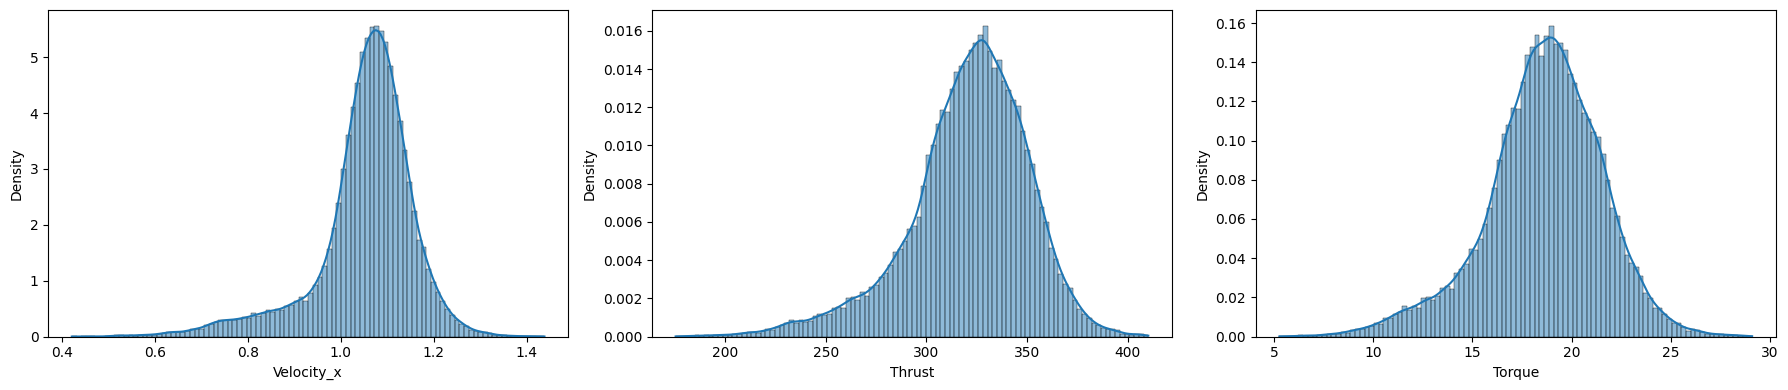

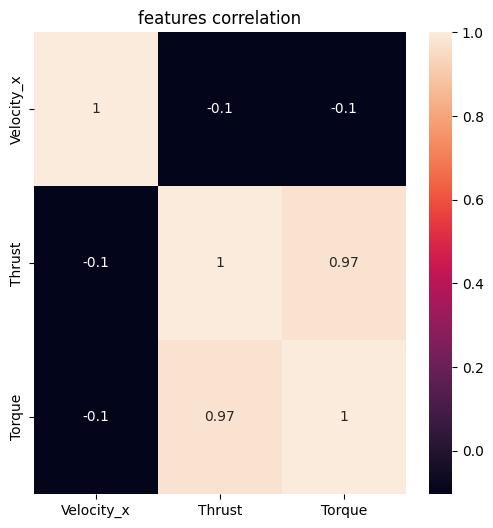

In [208]:
plot_data(df2d, '2D')

data3d

In [209]:
df3d = read_3d()
df3d.head()

,Velocity_x,Thrust,Torque
0,1.251265,270.964805,15.664648
1,1.124475,291.593688,16.621751
2,1.141473,277.379596,15.470365
3,1.127287,287.491617,15.597263
4,1.153895,284.219081,15.199767


In [210]:
df3d.isna().sum()

Velocity_x    0
Thrust        0
Torque        0
dtype: int64

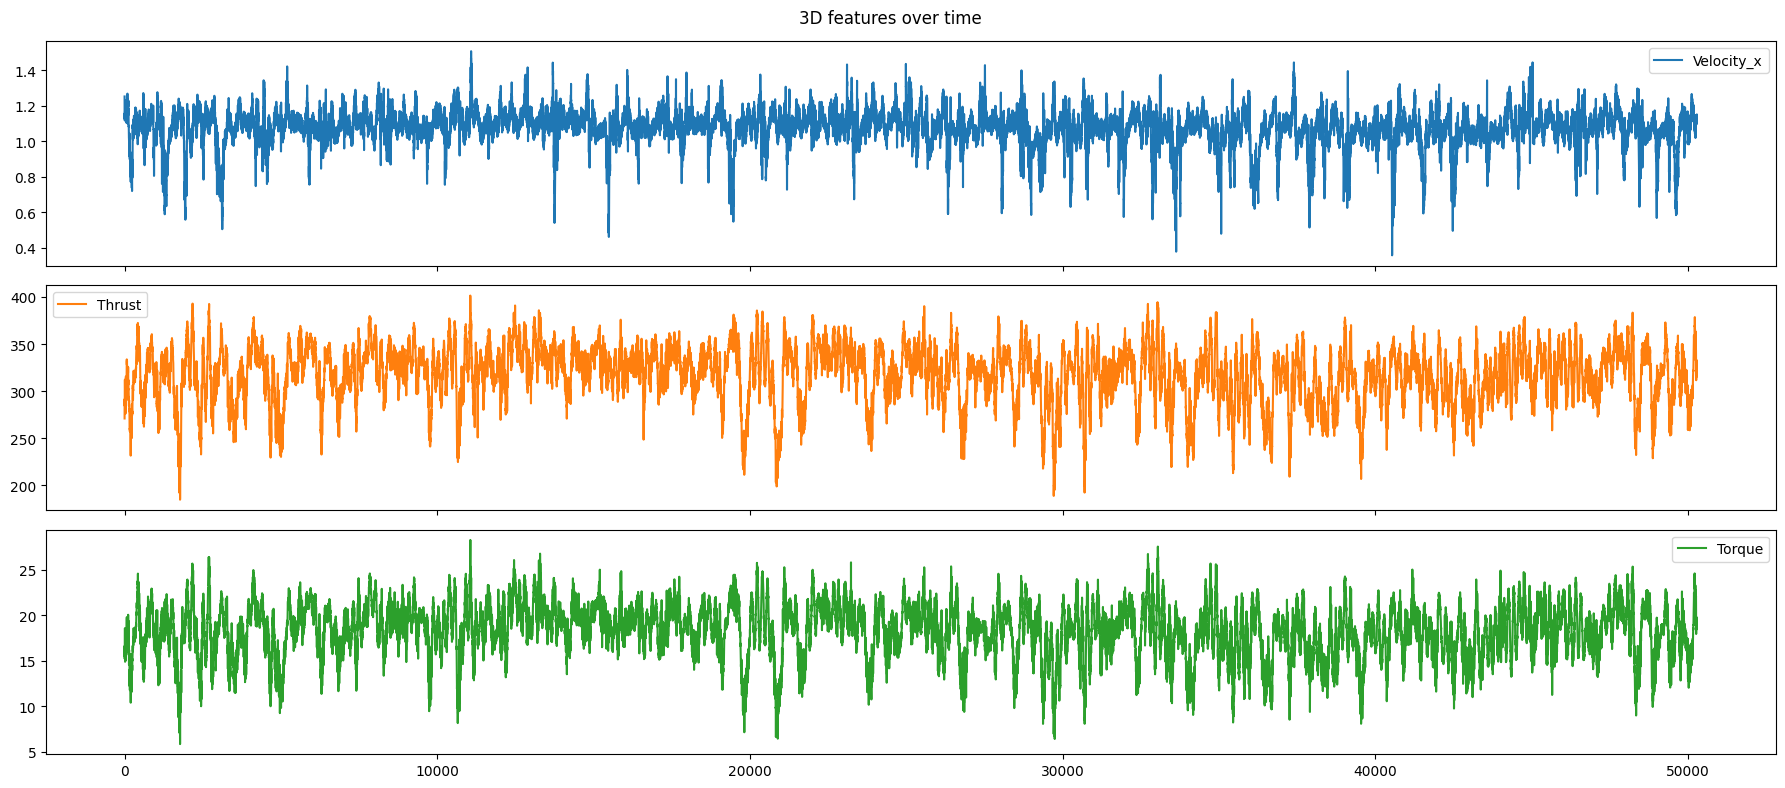

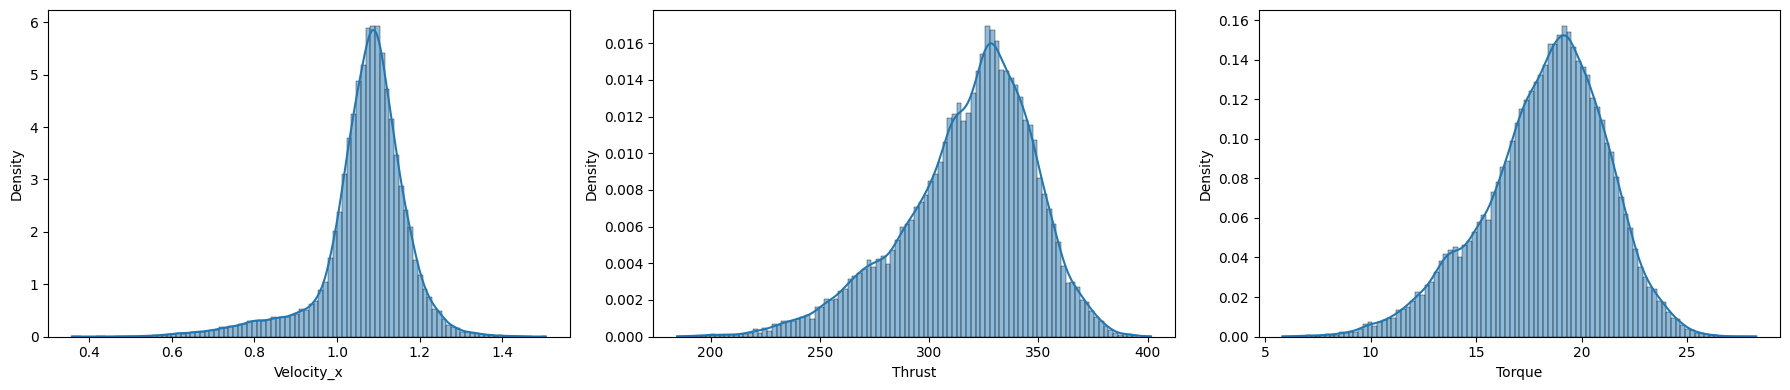

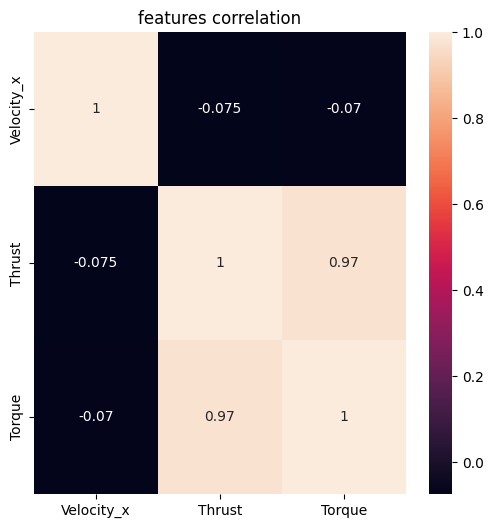

In [211]:
plot_data(df3d, '3D')

In [212]:
len(df1d), len(df2d), len(df3d)

(50400, 50395, 50280)

combine